# PyTASER Examples


The examples given below use electronic structure information from the Materials Project database. They require an API key that you can get from https://materialsproject.org/open



As the database is built from density functional theory calculations using a semi-local exchange-correlation functional, the band gaps are underestimated, so we apply a scissors operator to recover the experimental bandgap in each case. This is necessary to directly compared predicted and modelled spectra.

## Setup

In [4]:
from pytaser import generator, plotter

key = ''  # insert your own Materias Project key

## GaAs

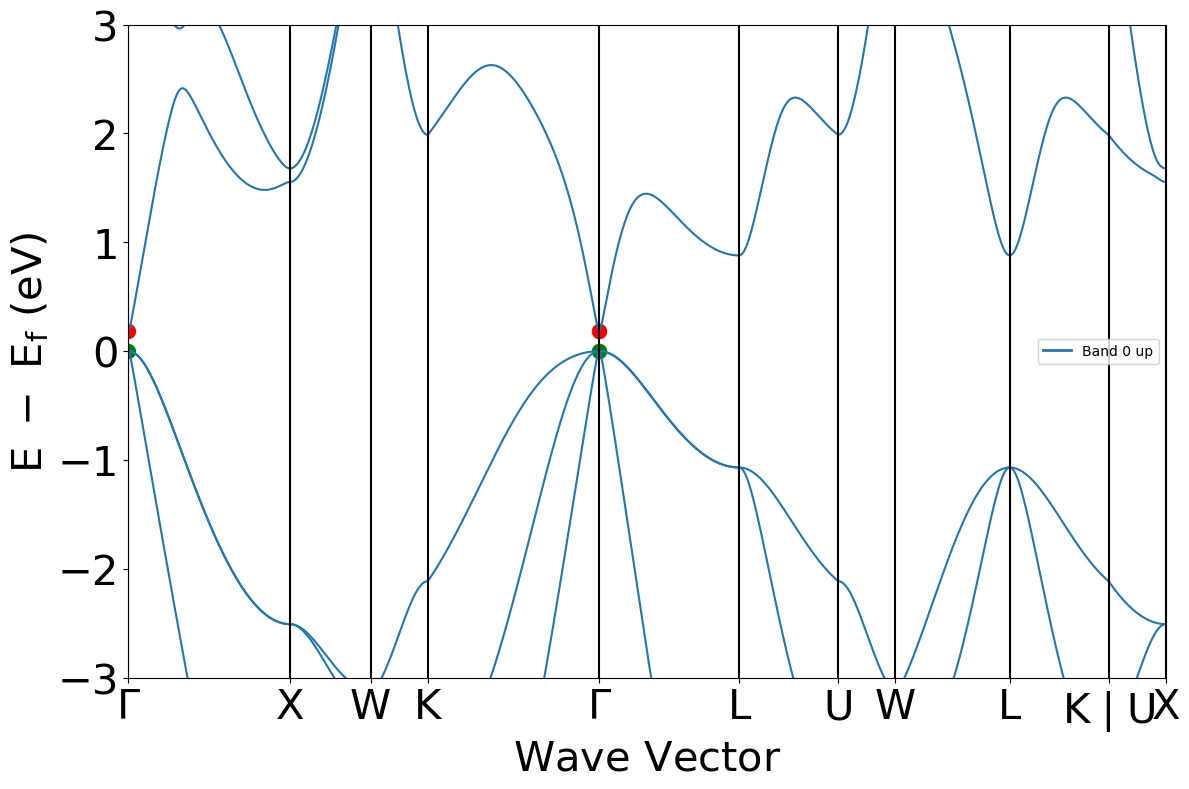

In [6]:
#Band structure read from pymatgen 
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import TaskType
from pymatgen.electronic_structure.plotter import BSPlotter
api = MPRester(key)
bs = api.get_bandstructure_by_material_id("mp-2534")

from pymatgen.electronic_structure.plotter import BSPlotter
plt = BSPlotter(bs).get_plot(vbm_cbm_marker=True,ylim=[-3,+3])

GridBox(children=(Checkbox(value=True, description='(-2, 1)', layout=Layout(display='block', width='200px'), s…

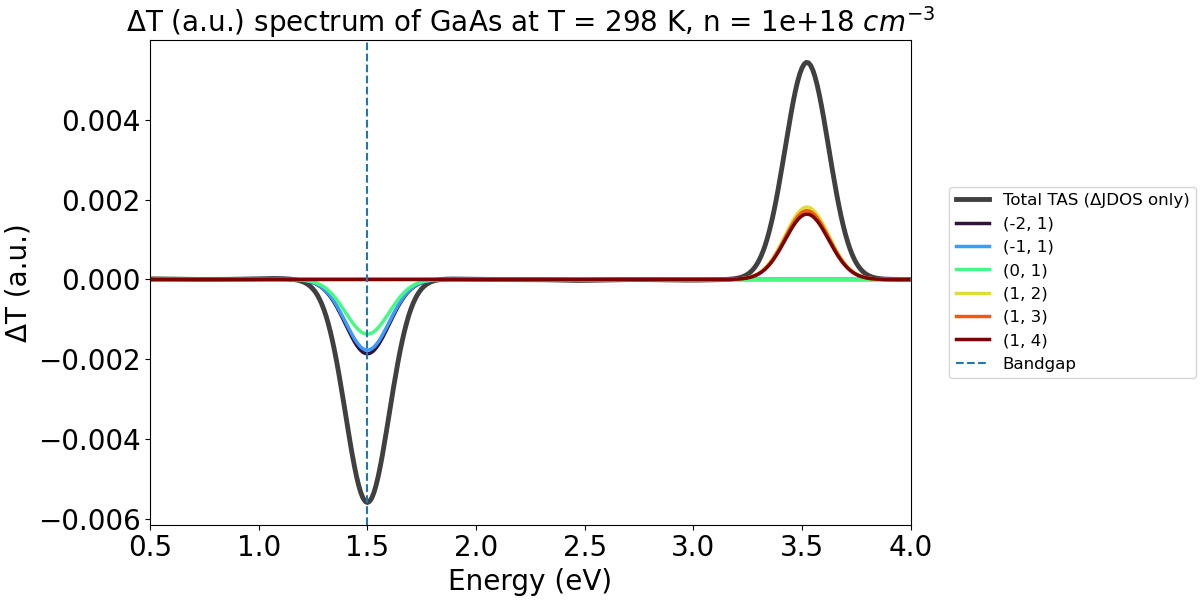

In [8]:
%matplotlib widget

# Setting values
temp = 298 # temperature in Kelvin
conc = 1e18 # carrier concentration per cm3 
bandgap = 1.5 # eV, standard value at T = 300 K
key ="kZ8rIdQEyOpsf2JX"

# Run pyTASER
data = generator.TASGenerator.from_mpid("mp-2534", bandgap, api_key=key)
process = data.generate_tas(temp, conc)
plot = plotter.TASPlotter(process, material_name="GaAs")

# Output energy plot 
energyplot = plot.get_plot(
    xaxis="energy", transition_cutoff=0.50, xmin=0.5, xmax=4, yaxis="tas",check_button=True)
# Reverse axis for better comparison to experiment
# You can change xaxis to "wavelength" 
energyplot.gca().invert_xaxis()

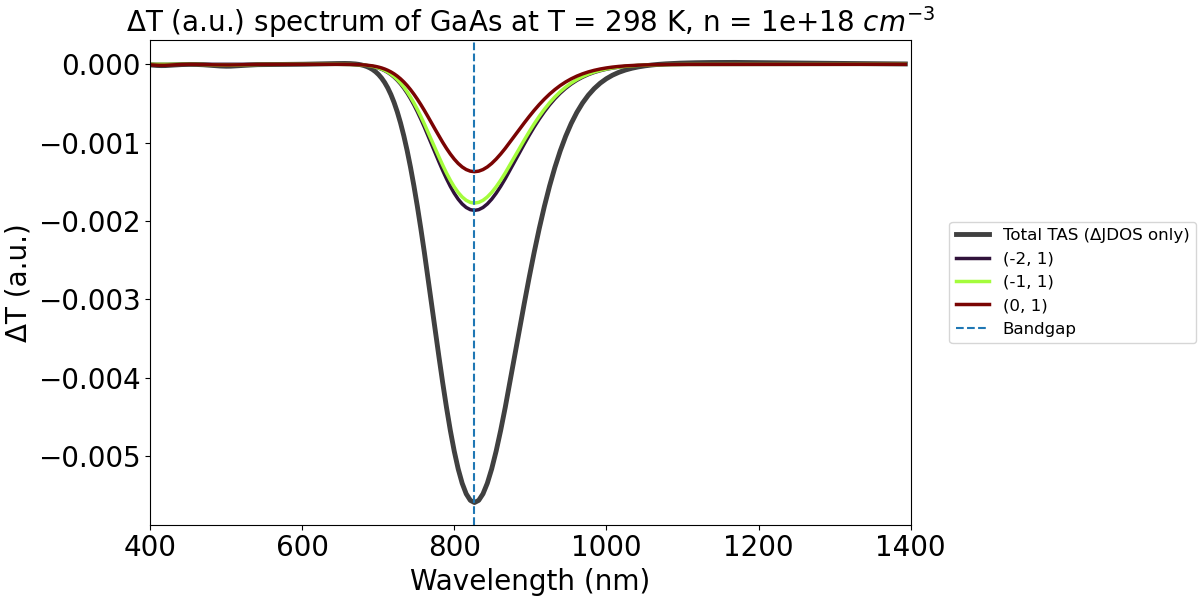

In [11]:
# Output wavelength plot
wavelengthplot = plot.get_plot(xaxis="wavelength",transition_cutoff=0.03,xmin=400,xmax=1400,yaxis="tas")